### BGR play

In [93]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
fourcc = cv.VideoWriter.fourcc(*'XVID')
cap.set(cv.CAP_PROP_FRAME_WIDTH, 9999)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 9999)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print(f'resolution available: {width}x{height}')
out = cv.VideoWriter('output.avi', fourcc, 20.0, (int(width), int(height)))

lena_img = cv.imread('opencv/samples/data/lena.jpg')
lena_img = cv.resize(lena_img, (int(width), int(height)))
# cv.imshow('lena', lena_img)
# cv.waitKey(3000)
# cv.destroyWindow('lena')
b_lena, g_lena, r_lena = cv.split(lena_img)

cnt = 0
def click_event(event, x, y, flags, user_data=None):
    global cnt
    if event == cv.EVENT_LBUTTONDOWN:
        cnt += 1
        font = cv.FONT_HERSHEY_SIMPLEX
        text = f'click {cnt}'
        # cv.putText(frame, text, (x, y), font, 1, (0, 0, 255), 4)
        cv.putText(frame, f'{frame[x][y][0]},{frame[x][y][1]},{frame[x][y][2]}', (x, y), font, 1, (0, 0, 255), 4)
        cv.imshow('vid', frame)
        print(f'clicking on frame {cnt}. {frame[x][y][0]},{frame[x][y][1]},{frame[x][y][2]}')



mask = np.zeros((height, width, 3), dtype=np.uint8)
mask = cv.rectangle(mask, (20, 0), (int(0.8*width), int(0.6*height)), (255,255,255), -1)
mask = cv.resize(mask, (width, height))
# cv.imshow('mask', mask)
# cv.waitKey(3000)
# cv.destroyWindow('mask')

cv.namedWindow('vid')
def nothing(val):
    pass
gray_track = cv.createTrackbar('blue_track', 'vid', 0, 100, nothing)

b_track = np.zeros(shape=(height, width, 3), dtype=np.uint8)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    font = cv.FONT_HERSHEY_SIMPLEX
    text = f'{width}x{height}'
    frame = cv.putText(frame, text, (2, 20), font, 0.4, (0, 255, 255), 1, cv.LINE_AA)
    ## adding the blue channel of lena to the frame
    # b_f, g_f, r_f = cv.split(frame)
    # frame = cv.merge((b_lena, g_f, r_f)) # replacing the blue channel of the video with the blue channel of lena 
    
    ## adding lena to the frame
    frame = cv.addWeighted(frame, 0.8, lena_img, 0.2, 0)
    
    ## applying the mask
    # print(frame.size, mask.size) 
    # frame = cv.bitwise_and(frame, mask)

    ## adding a trackbar to add blue value to the blue channe
    # pos = cv.getTrackbarPos('blue_track', 'vid')
    # b_track[:, :, 0] = pos
    # frame = frame + b_track
    # frame = np.clip(frame, 0, 255)


    cv.imshow('vid', frame)
    out.write(frame)
    cv.setMouseCallback('vid', click_event) # writing to the frame

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv.destroyAllWindows()

resolution available: 9999x9999


error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:108: error: (-215:Assertion failed) sz.width % 2 == 0 && sz.height % 3 == 0 in function 'cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0xc272edb3::Set<3,4,-1>,struct cv::impl::A0xc272edb3::Set<0,-1,-1>,1>::CvtHelper'


### HSV play

In [1]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
fourcc = cv.VideoWriter.fourcc(*'XVID')
cap.set(cv.CAP_PROP_FRAME_WIDTH, 9999)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 9999)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print(f'resolution available: {width}x{height}')

cv.namedWindow('vid')
def nothing(val):
    pass
LB_H_track = cv.createTrackbar('LB_H', 'vid', 0, 255, nothing)
LB_S_track = cv.createTrackbar('LB_S', 'vid', 0, 255, nothing)
LB_V_track = cv.createTrackbar('LB_V', 'vid', 0, 255, nothing)
UB_H_track = cv.createTrackbar('UB_H', 'vid', 255, 255, nothing)
UB_S_track = cv.createTrackbar('UB_S', 'vid', 255, 255, nothing)
UB_V_track = cv.createTrackbar('UB_V', 'vid', 255, 255, nothing)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    font = cv.FONT_HERSHEY_SIMPLEX
    text = f'{width}x{height}'
    frame = cv.putText(frame, text, (2, 20), font, 0.4, (0, 255, 255), 1, cv.LINE_AA)
    
    frame_hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)

    LB_H_track_pos = cv.getTrackbarPos('LB_H', 'vid')
    UB_H_track_pos = cv.getTrackbarPos('UB_H', 'vid')
    LB_S_track_pos = cv.getTrackbarPos('LB_S', 'vid')
    UB_S_track_pos = cv.getTrackbarPos('UB_S', 'vid')
    LB_V_track_pos = cv.getTrackbarPos('LB_V', 'vid')
    UB_V_track_pos = cv.getTrackbarPos('UB_V', 'vid')

    l_b = np.array([LB_H_track_pos, LB_S_track_pos, LB_V_track_pos])
    u_b = np.array([UB_H_track_pos, UB_S_track_pos, UB_V_track_pos])

    mask = cv.inRange(frame_hsv, l_b, u_b)
    res = cv.bitwise_and(frame, frame, mask=mask)

    cv.imshow('vid', frame)
    cv.imshow('vid_hsv', frame_hsv)
    cv.imshow('vid_mask', mask)
    cv.imshow('vid_res', res)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

resolution available: 640x480


### Thresholding

In [ ]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture(0)
fourcc = cv.VideoWriter.fourcc(*'XVID')
cap.set(cv.CAP_PROP_FRAME_WIDTH, 9999)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 9999)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print(f'resolution available: {width}x{height}')

cv.namedWindow('vid')
def nothing(val):
    pass

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    font = cv.FONT_HERSHEY_SIMPLEX
    text = f'{width}x{height}'
    frame = cv.putText(frame, text, (2, 20), font, 0.4, (0, 255, 255), 1, cv.LINE_AA)
    
    frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_th = cv.adaptiveThreshold(frame, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 3, 2)
    frame_th = cv.threshold(frame, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 3, 2)

    cv.imshow('vid', frame)
    cv.imshow('vid-th', frame_th)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

resolution available: 640x480


### Matplotlib play

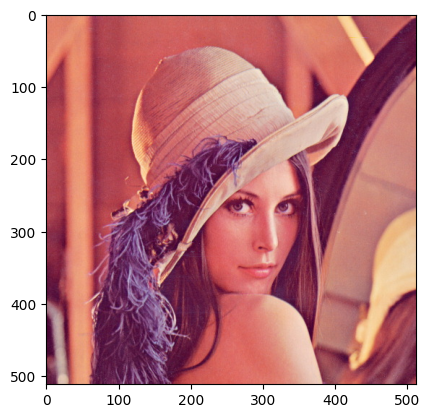

In [3]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

lena_img = cv.imread('opencv/samples/data/lena.jpg', 1)
# cv.imshow('image', lena_img)
lena_img = cv.cvtColor(lena_img, cv.COLOR_BGR2RGB)

plt.imshow(lena_img)
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()

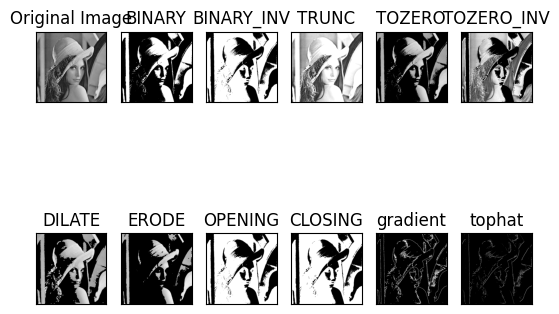

In [3]:
from matplotlib import pyplot as plt
import cv2 as cv
import numpy as np

img = cv.imread('opencv/samples/data/lena.jpg', cv.IMREAD_GRAYSCALE)
_, th1 = cv.threshold (img, 150, 255, cv.THRESH_BINARY)
_, th2 = cv.threshold (img, 150, 255, cv.THRESH_BINARY_INV)
_, th3 = cv.threshold (img, 150, 255, cv.THRESH_TRUNC)
_, th4 = cv.threshold (img, 150, 255, cv.THRESH_TOZERO)
_, th5 = cv.threshold (img, 150, 255, cv.THRESH_TOZERO_INV)
kernel = np.ones((2,2), np.uint8)
dilate = cv.dilate(th4, kernel, iterations=4)
erode = cv.erode(th4, kernel, iterations=4)
opening = cv.morphologyEx(th2, cv.MORPH_OPEN, kernel)
closing = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
gradient = cv.morphologyEx(th2, cv.MORPH_GRADIENT, kernel)
tophat = cv.morphologyEx(th2, cv.MORPH_TOPHAT, kernel)
titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO' , 'TOZERO_INV', 'DILATE', 'ERODE', 'OPENING', 'CLOSING', 'gradient', 'tophat']
images = [img, th1 ,th2 , th3 ,th4, th5, dilate, erode, opening, closing, gradient, tophat]
for i in range(len(titles)) :
	plt.subplot(2, 6, i+1), plt.imshow(images[i], 'gray')
	plt.title(titles[i])
	plt.xticks([]), plt.yticks([])
#cv. imshow ("Image", img)
#cv.imshow("th1", th1)
plt.show()

### Removing noise/ smoothing images

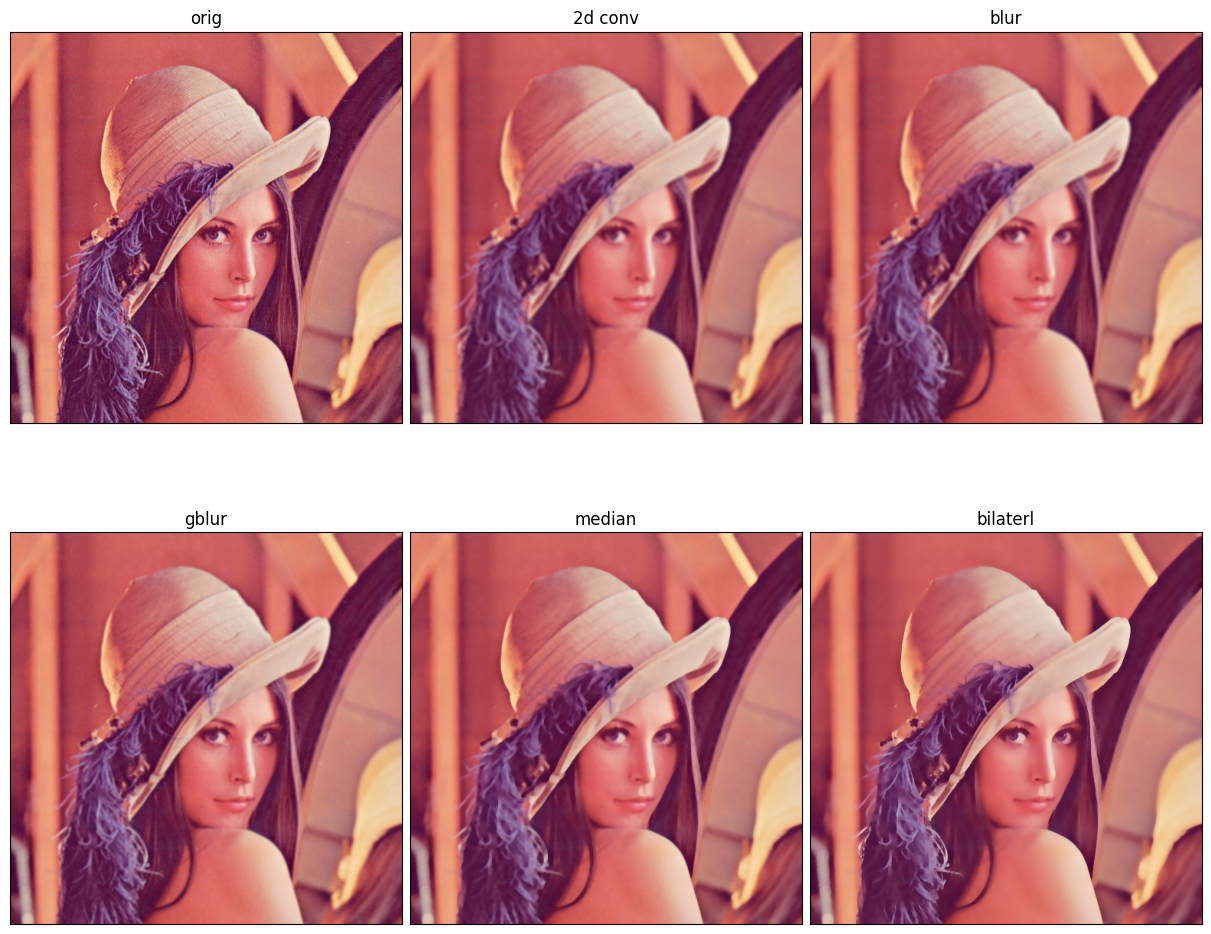

In [55]:
import matplotlib.pyplot as plt
img = cv.imread('opencv/samples/data/lena.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# plt.subplot(1, 1, 1)
# plt.imshow(img)

kernel = np.ones((5,5), np.float32)/25
dst = cv.filter2D(img, -1, kernel)
blr = cv.blur(img, (5,5))
gblr = cv.GaussianBlur(img, (5,5), 0)
median = cv.medianBlur(img , 5)
# good if you want to keep the edges sharp while reducing noise
bilaterl = cv.bilateralFilter(img, 9, 75, 75) 

titles = ['orig', '2d conv', 'blur', 'gblur', 'median', 'bilaterl']
images = [img, dst, blr, gblr, median, bilaterl]
fig = plt.figure(figsize=(12,10), layout='constrained')
for i in range(len(titles)) :
	plt.subplot(2, 3, i+1)
	plt.imshow(images[i])
	plt.title(titles[i])
	plt.xticks([]), plt.yticks([])

# se poate observa la linia bratului.

# plt.show()

### Image gradients filters for edge detection

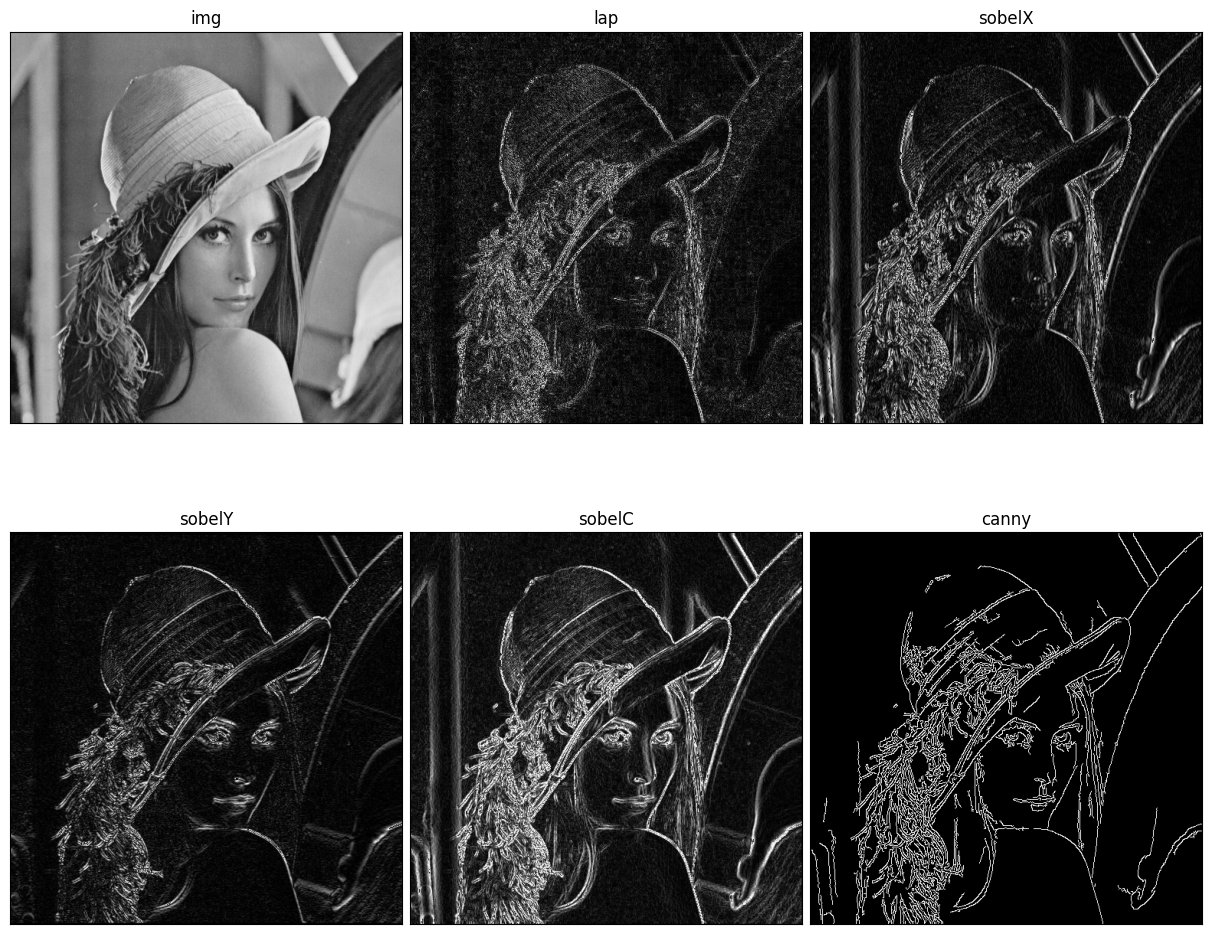

In [113]:
img = cv.imread('opencv/samples/data/lena.jpg', cv.IMREAD_GRAYSCALE)
lap = np.uint8(np.absolute(cv.Laplacian(img, cv.CV_64F, ksize=3)))
sobelX = np.uint8(np.absolute(cv.Sobel(img, cv.CV_64F, 1, 0)))
sobelY = np.uint8(np.absolute(cv.Sobel(img, cv.CV_64F, 0, 1)))
sobelC = cv.bitwise_or(sobelX, sobelY)
canny = cv.Canny(img, 50, 200)
titles = ['img', 'lap', 'sobelX', 'sobelY', 'sobelC', 'canny']
images = [img, lap, sobelX, sobelY, sobelC, canny]
fig = plt.figure(figsize=(12,10), layout='constrained')
for i in range(len(titles)) :
	plt.subplot(2, 3, i+1)
	plt.imshow(images[i], 'gray')
	plt.title(titles[i])
	plt.xticks([]), plt.yticks([])

# se poate observa la linia bratului.

# plt.show()

### Pyramiding and blending images together


In [5]:
img = cv.imread('opencv/samples/data/lena.jpg')
pd1 = cv.pyrDown(img)
pd2 = cv.pyrDown(pd1)
pu1 = cv.pyrUp(img)
pu2 = cv.pyrUp(pu1)

titles = ['img', 'pd1', 'pd2', 'pu1', 'pu2']
images = [img,  pd1, pd2, pu1, pu2]
for i in range(len(titles)) :
	cv.imshow(titles[i], images[i])

cv.waitKey(0)
cv.destroyAllWindows()

In [6]:
import cv2 as cv
import numpy as np

apple = cv.imread('opencv/samples/data/apple.jpg')
orange = cv.imread('opencv/samples/data/orange.jpg')

print(apple.shape)
print(orange.shape)
apple_orange = np.hstack((apple [:, :256], orange [:, 256: ]))
# generate Gaussian pyramid for apple
apple_copy = apple.copy()
gp_apple = [apple_copy]
for i in range(6) :
	apple_copy = cv.pyrDown(apple_copy)
	gp_apple.append(apple_copy)
# generate Gaussian pyramid for orange
orange_copy = orange.copy()
gp_orange = [orange_copy]
for i in range(6) :
	orange_copy = cv.pyrDown(orange_copy)
	gp_orange.append(orange_copy)

# generate Laplacian Pyramid for apple
apple_copy = gp_apple [5]
lp_apple = [apple_copy]
for i in range(5, 0, -1) :
	gaussian_expanded = cv.pyrUp(gp_apple [i])
	laplacian = cv.subtract(gp_apple[i-1], gaussian_expanded)
	lp_apple.append(laplacian)
# generate Laplacian Pyramid for orange
orange_copy = gp_orange [5]
lp_orange = [orange_copy]
for i in range(5, 0, -1) :
	gaussian_expanded = cv.pyrUp(gp_orange [i])
	laplacian = cv.subtract(gp_orange [i-1], gaussian_expanded)
	lp_orange.append(laplacian)

# Now add left and right halves of images in each level
apple_orange_pyramid = []
n = 0
for apple_lap, orange_lap in zip(lp_apple, lp_orange) :
	n += 1
	cols, rows, ch = apple_lap.shape
	laplacian = np.hstack((apple_lap[:, 0:int(cols/2) ], orange_lap[:, int(cols/2) : ]))
	apple_orange_pyramid.append(laplacian)
# now reconstruct
apple_orange_reconstruct = apple_orange_pyramid[0]
for i in range(1, 6) :
	apple_orange_reconstruct = cv.pyrUp(apple_orange_reconstruct)
	apple_orange_reconstruct = cv.add(apple_orange_pyramid[i], apple_orange_reconstruct)
cv.imshow("apple", apple)
cv.imshow("orange", orange)
cv.imshow("apple_orange", apple_orange)
cv.imshow("apple orange reconstruct", apple_orange_reconstruct)

cv.waitKey(0)
cv.destroyAllWindows()

(512, 512, 3)
(512, 512, 3)


### Finding out contours

In [8]:
img = cv.imread('opencv/samples/data/lena.jpg', cv.IMREAD_COLOR)
img_orig = img.copy()
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray, 127, 255, cv.THRESH_BINARY)
contours, hier = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
cv.drawContours(img, contours, -1, (0, 255, 0), 1)

cv.imshow('img_orig', img_orig)
cv.imshow('img', img)
cv.imshow('thresh', thresh)
cv.waitKey(0)
cv.destroyAllWindows() 

### Detecting movement of people

In [13]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('opencv/samples/data/vtest.avi')
# cap = cv.VideoCapture(0)
cap.set(cv.CAP_PROP_FRAME_WIDTH, 9999)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 9999)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print(f'resolution available: {width}x{height}')

while True:
	ret, frame1 = cap.read()
	if ret == 0:
		print('failed reading frame')
	ret, frame2 = cap.read()
	if ret == 0:
		print('failed reading frame')
	break

cv.namedWindow('vid')
while cap.isOpened():
	diff = cv.absdiff(frame1, frame2)
	cv.imshow('vid-blur', diff)
	gray = cv.cvtColor(diff, cv.COLOR_BGR2GRAY)
	blur = cv.GaussianBlur(gray, (5,5), 0)
	_, thresh = cv.threshold(blur, 20, 255, cv.THRESH_BINARY)
	dilated = cv.dilate(thresh, None, iterations=3)
	cv.imshow('vid-dff', thresh)
	contours, _ = cv.findContours(dilated, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
	
	for contour in contours:
		(x, y, w, h) = cv.boundingRect(contour)
		if cv.contourArea(contour) < 700:
			continue
		if w >  60:
			continue
		cv.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)

	# cv.drawContours(frame1, contours, -1, (0, 255, 0), 2)

	font = cv.FONT_HERSHEY_SIMPLEX
	text = f'{width}x{height}'
	frame = cv.putText(frame1, text, (2, 20), font, 0.4, (0, 255, 255), 1, cv.LINE_AA)
    
	cv.imshow('vid', frame)

	frame1 = frame2
	ret, frame2 = cap.read()
	if ret == 0:
		break

	if cv.waitKey(1) & 0xFF == ord('q'):
		break

cap.release()
cv.destroyAllWindows()

resolution available: 768x576


### Approximating polygons with contours

In [14]:
import cv2 as cv

img = cv.imread('opencv/samples/data/HappyFish.jpg', cv.IMREAD_GRAYSCALE)
_, thresh = cv.threshold(img, 240, 255, cv.THRESH_BINARY)
blur = cv.blur(img, (11,11))
contours, _ = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print(len(contours))

cv.imshow('thresh', thresh)

for contour in contours:
	approx = cv.approxPolyDP(contour, 0.01*cv.arcLength(contour, True), True)
	cv.drawContours(img, [approx], 0, (0, 255, 0), 2)


cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

209


### Template matching 

In [2]:
import cv2 as cv
import numpy as np


# evil-snail
# evil-snail-big-1
template = cv.imread('opencv/samples/data/evil_snail.png', cv.IMREAD_GRAYSCALE)
img = cv.imread('opencv/samples/data/evil-snail-big-1.png', cv.IMREAD_GRAYSCALE)

# cv.imshow('templte', template)
# cv.imshow('img', img)

w, h = template.shape[::-1]

res = cv.matchTemplate(img, template, cv.TM_)
print(res)
threshold = 0.2
loc = np.where(res >= threshold)
print(loc)

for pt in zip(*loc[::-1]):
	cv.rectangle(img, pt, (pt[0] + w, pt[1] + h), 2)

cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

[[-0.50146335 -0.50470287 -0.5078943  ... -0.0727903  -0.06484644
  -0.05727692]
 [-0.49896923 -0.502159   -0.50529873 ... -0.07031289 -0.06214345
  -0.05449136]
 [-0.49644458 -0.4995348  -0.5025599  ... -0.06777558 -0.05950207
  -0.05186154]
 ...
 [-0.14808336 -0.14898719 -0.14995001 ... -0.21016423 -0.20867163
  -0.20817865]
 [-0.14825602 -0.14913256 -0.15009144 ... -0.20878759 -0.20729446
  -0.20677063]
 [-0.14837962 -0.14923179 -0.15018386 ... -0.20732501 -0.20575964
  -0.20513467]]
(array([ 84,  84,  84, ..., 164, 164, 164], dtype=int64), array([263, 264, 265, ..., 193, 194, 195], dtype=int64))


### Line detection using HoughLines and Canny edge

In [15]:
import cv2 as cv
import numpy as np

img = cv.imread('./opencv/samples/data/sudoku.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2RGB)

edges = cv.Canny(gray, 50, 150, apertureSize=3)
lines = cv.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
for line in lines:
	x1, y1, x2, y2 = line[0]
	cv.line(img, (x1, y1), (x2, y2), (0,255,0), 2)


cv.imshow('img', img)
cv.imshow('edges', edges)

cv.waitKey(0)
cv.destroyAllWindows()


#### on image

(641, 1171, 3)


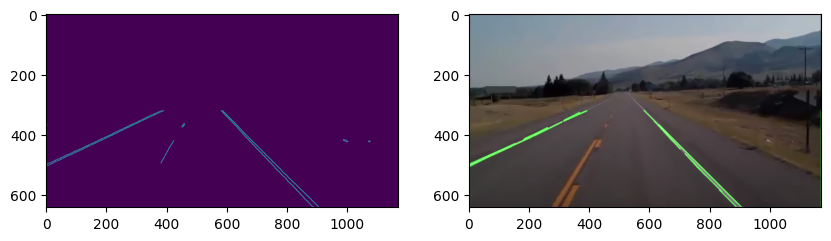

In [3]:
import matplotlib.pylab as plt
import cv2 as cv
import numpy as np

def region_of_interest(img, vertices) :
	mask = np.zeros_like(img)
	match_mask_color = 255
	cv.fillPoly(mask, vertices, match_mask_color)
	masked_image = cv.bitwise_and(img, mask)
	return masked_image

def draw_the_lines(img, lines) :
	img = np.copy(img)
	blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
	for line in lines:
		for x1, y1, x2, y2 in line:
			cv.line(blank_image,(x1,y1),(x2,y2),(0,255, 0), thickness=3)
	img = cv.addWeighted(img, 0.8, blank_image, 1, 0.0) 
	return img


img = cv.imread('./opencv/samples/data/road.png')

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
print(img.shape)
height = img.shape [0]
width = img.shape[1]
region_of_interest_vertices = [
	(0, height),
	(0, height/2),
	(width, height/2),
	(width, height)
]
gray_image = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
canny_image = cv.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(canny_image,
									np.array([region_of_interest_vertices], np.int32) )
lines = cv.HoughLinesP(cropped_image,
						rho=6,
						theta=np.pi/60,
						threshold=160,
						lines=np.array([]),
						minLineLength=40,
						maxLineGap=25)

img_with_lines = draw_the_lines(img, lines)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(cropped_image)
plt.subplot(2, 2, 2) 
plt.imshow(img_with_lines)
plt.show()


#### on video

In [13]:
import matplotlib.pylab as plt
import cv2 as cv
import numpy as np

def region_of_interest(img, vertices) :
	mask = np.zeros_like(img)
	match_mask_color = 255
	cv.fillPoly(mask, vertices, match_mask_color)
	masked_image = cv.bitwise_and(img, mask)
	return masked_image

def draw_the_lines(img, lines=None) :
	if lines is None:
		lines = []
	img = np.copy(img)
	blank_image = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
	for line in lines:
		for x1, y1, x2, y2 in line:
			cv.line(blank_image,(x1,y1),(x2,y2),(0,255, 0), thickness=3)
	img = cv.addWeighted(img, 0.8, blank_image, 1, 0.0) 
	return img

cap = cv.VideoCapture(0)
cap.set(cv.CAP_PROP_FRAME_WIDTH, 9999)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 9999)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print(f'resolution available: {width}x{height}')

while cap.isOpened():
	ret, frame = cap.read()
	if not ret:
		break

	# frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
	height = frame.shape [0]
	width = frame.shape[1]
	region_of_interest_vertices = [
		(0, height),
		(0, height/2),
		(width, height/2),
		(width, height)
	]
	gray = cv.cvtColor(frame, cv.COLOR_RGB2GRAY)
	canny = cv.Canny(gray, 100, 200)
	cropped = region_of_interest(canny, np.array([region_of_interest_vertices], np.int32))
	lines = cv.HoughLinesP(cropped,
							rho=6,
							theta=np.pi/60,
							threshold=160,
							lines=np.array([]),
							minLineLength=40,
							maxLineGap=25)

	frame_with_lines = draw_the_lines(frame, lines)

	cv.imshow('frame', frame)
	cv.imshow('gray', gray)
	cv.imshow('cropped', cropped)
	cv.imshow('canny', canny)
	cv.imshow('frame_with_lines', frame_with_lines)

	if cv.waitKey(1)&0xFF == ord('q'):
		break

cv.destroyAllWindows()


resolution available: 640x480


### Circle detection using hough circle transformation

In [27]:
import cv2 as cv
import numpy as np


img = cv.imread('opencv/samples/data/smarties.png', cv.IMREAD_COLOR)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = cv.medianBlur(gray, 5)
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)
circles = np.uint16(np.round(circles))

for (x, y, r) in circles[0, :]:
	cv.circle(img, (x, y), r, (255, 255, 0), 2)
	cv.circle(img, (x, y), 2, (255, 0, 0), 2)


cv.imshow('img', img)
cv.waitKey(0)
cv.destroyAllWindows()

### Face detection using haarcascade

In [3]:
import cv2 as cv

file = './opencv/data/haarcascades/haarcascade_frontalface_default.xml'
face_cascade = cv.CascadeClassifier(file)

cap = cv.VideoCapture(0)
fourcc = cv.VideoWriter.fourcc(*'XVID')
cap.set(cv.CAP_PROP_FRAME_WIDTH, 9999)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 9999)
width = int(cap.get(cv.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv.CAP_PROP_FRAME_HEIGHT))
print(f'resolution available: {width}x{height}')

cv.namedWindow('vid')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    font = cv.FONT_HERSHEY_SIMPLEX
    text = f'{width}x{height}'
    frame = cv.putText(frame, text, (2, 20), font, 0.4, (0, 255, 255), 1, cv.LINE_AA)
    
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv.rectangle(frame, (x, y), (x+w, y+h), (255, 255, 0), 2)

    cv.imshow('vid', frame)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

resolution available: 640x480


### Harris Corner Detection

In [3]:
import numpy as np
import cv2 as cv

img = cv.imread('./opencv/samples/data/chessboard.png')
# cv.imshow('img', img)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)

img[dst > 0.01 * dst.max()] = [0, 0, 255]
cv.imshow('dst', img)
cv.waitKey(0)
cv.destroyAllWindows()


### Shi-Tomasi corner detection

In [7]:
import numpy as np
import cv2 as cv
img = cv.imread('./opencv/samples/data/chessboard.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray, 100, 0.01, 10)
corners = np.intp(corners)
for i in corners:
	x, y = i. ravel()
	cv.circle(img, (x, y), 5, (0,0,255), -1)
cv.imshow('dst', img)
cv.waitKey(0)
cv.destroyAllWindows()

### Background substraction

In [81]:
import numpy as np
import cv2 as cv
cap = cv.VideoCapture('./opencv/samples/data/vtest.avi')
# fgbg = cv.bgsegm.createBackgroundSubtractorMOG()
fgbg = cv.createBackgroundSubtractorMOG2()
fgbg = cv.createBackgroundSubtractorKNN()
# fgbg = cv.bgsegm.createBackgroundSubtractorGMG()
while True:
	ret, frame = cap. read()
	if frame is None:
		break

	fgmask = fgbg.apply(frame)
	cv.imshow('Frame', frame)
	cv.imshow('FG MASK Frame', fgmask)
	
	keyboard = cv.waitKey(1)
	if keyboard == ord('q'):
		break

cap.release()
cv.destroyAllWindows()

### Object tracking (not that great)

In [80]:
import numpy as np
import cv2 as cv

cap = cv. VideoCapture('./opencv/samples/data/vtest.avi')
# take first frame of the video
ret, frame = cap. read()
# setup initial location of window
x, y, width, height = 255, 220, 40, 100
track_window =(x, y , width, height)

# ret, frame = cap. read()
# cv.rectangle(frame,(x,y),(x+width, y+height), 255, 3)
# cv.imshow('frame', frame)

# cv.waitKey(0)
# cv.destroyAllWindows()
# cap.release()


roi = frame [y:y+height, x : x+width]
hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)

# we use inRange function because only the hue is taken into account
mask = cv.inRange(hsv_roi, np.array((0., 60., 32.) ), np. array((180., 255., 255)))
roi_hist = cv.calcHist([hsv_roi], [0], mask, [180], [0,180])
cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by atleast 1 pt


term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)
cv.imshow('roi', roi)
while(1) :
	ret, frame = cap. read()
	if not ret:
		break
	
	hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
	dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
	
	# apply meanshift to get the new location
	# ret, track_window = cv.meanShift(dst, track_window, term_crit)
	ret, track_window = cv.CamShift(dst, track_window, term_crit)
	
	# Draw it on image
	x, y, w, h = track_window
	final_image = cv.rectangle(frame,(x,y),(x+w, y+h), 255, 3)
	
	cv.imshow('dst', dst)
	cv.imshow('final_image',final_image)
	
	k = cv.waitKey(30) & 0xff
	if k == ord('q'):
		break


cap.release()
cv.destroyAllWindows()

### Warping perspective

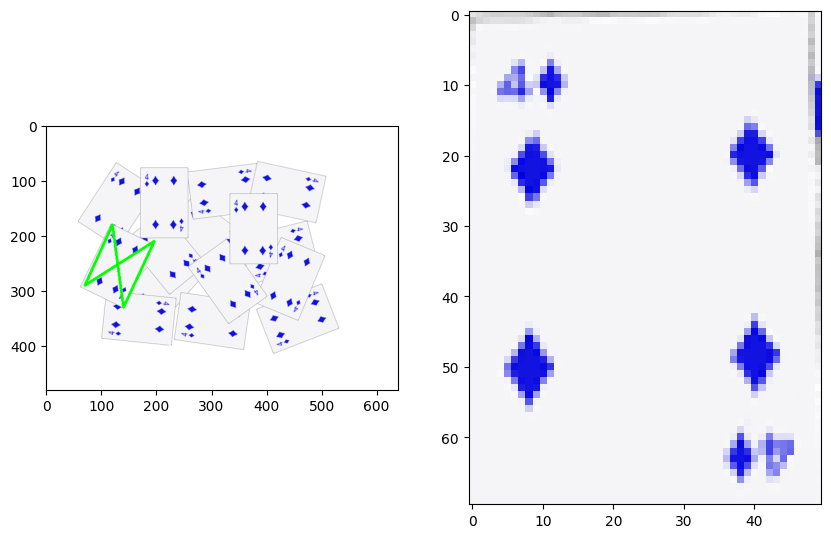

In [79]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('./opencv/samples/data/cards.png')

width, height = 50, 70
poly_pts = np.int32([ [140,330], [196, 210], [70,290],[120,180],])
# pts1 = np.float32([[180,120], [210, 180], [290,70], [330,120]])
pts1 = np.float32(poly_pts)
pts2 = np.float32([[0,0], [width, 0], [0,height], [width,height]])
matrix = cv.getPerspectiveTransform(pts1, pts2)
out = cv.warpPerspective(img, matrix, (width, height))
cv.polylines(img, [poly_pts], True, (0, 255, 0), 3)
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(out)
